In [ ]:
import numpy as np
# import cupy as cp
import utils.dirutils as dd
import matplotlib.pyplot as plt
import os
import os.path
import fnmatch
import re

%matplotlib widget

In [ ]:
cd ~/Data/tmp

In [51]:
ls *L3_10um_Light*.h5

 �Ϻа� C �����ϺШS�����ҡC
 �ϺаϧǸ�:  6457-8316

 C:\Users\Lab\Data\tmp ���ؿ�

2022/06/10  �U�� 06:33        85,050,800 10000_L3_10um_Light.h5
2022/06/10  �U�� 08:03        85,050,800 100000_L3_10um_Light.h5
2022/06/10  �U�� 08:14        85,050,800 110000_L3_10um_Light.h5
2022/06/10  �U�� 08:24        85,050,800 120000_L3_10um_Light.h5
2022/06/10  �U�� 08:34        85,050,800 130000_L3_10um_Light.h5
2022/06/10  �U�� 08:44        85,050,800 140000_L3_10um_Light.h5
2022/06/10  �U�� 08:54        85,050,800 150000_L3_10um_Light.h5
2022/06/10  �U�� 09:04        85,050,800 160000_L3_10um_Light.h5
2022/06/10  �U�� 09:14        85,050,800 170000_L3_10um_Light.h5
2022/06/10  �U�� 09:24        85,050,800 180000_L3_10um_Light.h5
2022/06/10  �U�� 09:34        85,050,800 190000_L3_10um_Light.h5
2022/06/10  �U�� 06:43        85,050,800 20000_L3_10um_Light.h5
2022/06/10  �U�� 09:44        85,050,800 200000_L3_10um_Light.h5
2022/06/10  �U�� 06:53        85,050,800 30000_L3_10um_Light.h5
2022/06/10  �U�� 0

In [52]:
import sys
path = "200000_L3_10um_Light.h5"
# path = "/mnt/c/Users/Lab/Data/results/LG00_121-121-121.h5"
data = dd.retrieve(path)
module = sys.modules[__name__]
for name, value in data.items():
    setattr(module, name, value)

In [45]:


x = np.linspace(-Lx,Lx,Nx)
y = np.linspace(-Ly,Ly,Ny)
z = np.linspace(-Lz,Lz,Nz)
dx = np.diff(x)[0]
dy = np.diff(y)[0]
dz = np.diff(z)[0]
hbar = 1.054571800139113e-34 
m = 1.411000000000000e-25
unit = np.sqrt(hbar/m/Wz)
[X,Y,Z] = np.meshgrid(x,y,z)
Epot = ( (Wx**2*X**2 + Wy**2*Y**2 + Wz**2*Z**2 )
                / (2*Wz**2) )
psiGmu = (15*Ggg / ( 16*np.pi*np.sqrt(2) )  )**(2/5)
TF_amp = np.array((psiGmu-Epot)/Ggg)
np.clip(TF_amp, 0, np.inf,out=TF_amp)
TF_pbb = np.sqrt(TF_amp)
total = np.sum(np.abs(TF_pbb)**2*dx*dy*dz)
n_TF_pbb = TF_pbb/np.sqrt(total,dtype=np.complex128)

In [50]:
Wx

452

In [ ]:
plt.figure()
plt.plot(x*unit/1e-6,np.abs(n_TF_pbb[60,:,60])**2)
plt.xlabel('x(um)')
plt.ylabel("|TF|^2")

In [46]:
np.sqrt(2*psiGmu)*unit/1e-6

9.448163282474445

In [48]:
# verify TF radius
np.nonzero(n_TF_pbb[60,:,60]!=0)
(x[85] - x[35])/2*unit/1e-6

10.097978294271806

In [47]:
W0*unit/1e-6

10.000000000000002

In [ ]:
# verify  beam waist
np.max(np.abs(LGdata)**2)*1/np.e**2
np.nonzero(np.abs(LGdata[60,:,60])**2 == 0.1353352832366127)
x[81] - x[60]

In [ ]:
includes = ['*/??0000_L1_10um_Light.h5'] # for files only
# includes = ['*0000L6*test.h5'] # for files only
excludes = [''] # for dirs and files

# transform glob patterns to regular expressions
includes = r'|'.join([fnmatch.translate(x) for x in includes])
excludes = r'|'.join([fnmatch.translate(x) for x in excludes]) or r'$.'

legends = [None]
for root, dirs, files in os.walk(os.getcwd()):
    
    # exclude/include files
    files = [os.path.join(root, f) for f in files]
    files = [f for f in files if re.match(includes, f)]
    files = [f for f in files if not re.match(excludes, f)]

# sfiles = sorted(files, key=lambda x: int(x.split('/')[-1].split('L')[0][:-1]))
sfiles = sorted(files, key=lambda x: int(x.split('/')[-1].split('_')[0]))


In [ ]:
sfiles

In [ ]:
legends = []
plt.figure()
for file in sfiles:
    data = dd.retrieve(file)
    Lx = data['Lx']
    Nx = data['Nx']
    Ly = data['Ly']
    Ny = data['Ny']
    Lz = data['Lz']
    Nz = data['Nz']
    x = np.linspace(-Lx, Lx, Nx)
    y = np.linspace(-Ly, Ly, Ny)
    z = np.linspace(-Lz, Lz, Nz)
    dx = np.diff(x)[0]
    dy = np.diff(y)[0]
    dz = np.diff(z)[0]
    psiE = data['psiE']
    plt.plot(x*unit/1e-6, np.abs(psiE[60,:,60])**2*dx*dy*dz)
    # legends.append(file.split('/')[-1].split('L')[0][:-1])
    legends.append(file.split('/')[-1].split('_')[0])
    
L = dd.retrieve(sfiles[0])['L']
plt.title(f"L={L}")
plt.xlabel(r'x($\mu m$)')
plt.ylabel(r'$|\psi_{E}|^{2}$')
plt.legend(legends)
plt.show()

In [ ]:
plt.figure()
plt.plot(x,np.abs(LG[60,:,60])**2)
plt.plot(x,np.abs(psiE[60,:,60])**2*1000)
plt.legend(['LG', 'psiE'])
plt.show()


In [ ]:
form = "/mnt/c/Users/Lab/Data/tmp/100000_L{}_10um_1e-6.h5"
datas = [None]*6
for i in range(1,7):
    file = form.format(i)
    data = dd.retrieve(file)
    conG = data['convergeG']
    conE = data['convergeE']
    dw = data['dw']
    stepJ = data['stepJ']
    n = data['nj']
    
    datas[i-1] = conE
    


In [ ]:

plt.figure()
plt.title(f'dt={dw}')
plt.xlabel("imaginary time")
plt.ylabel("Relative error")
x = np.arange(stepJ,n+1,stepJ)*dw
for i in range(len(datas)):
    plt.plot(x,datas[i][1:])

plt.legend([f"L={i}" for i in range(1,len(datas)+1)])
plt.show()

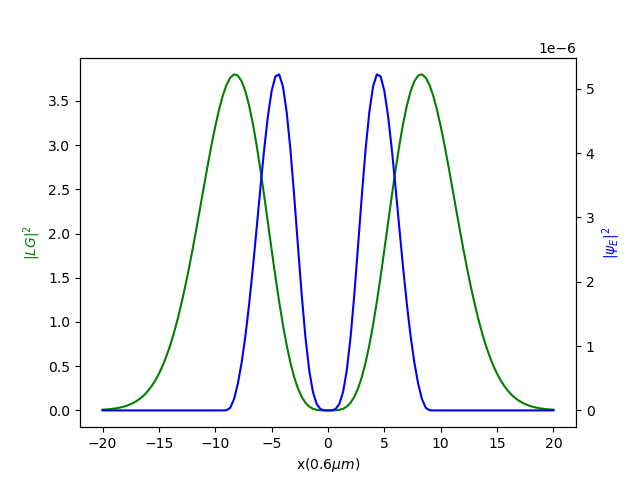

In [37]:
path = "100100_L2_test.h5"
data = dd.retrieve(path)

Lx = data['Lx']
Nx = data['Nx']
Ly = data['Ly']
Ny = data['Ny']
Lz = data['Lz']
Nz = data['Nz']
x = np.linspace(-Lx, Lx, Nx)
y = np.linspace(-Ly, Ly, Ny)
z = np.linspace(-Lz, Lz, Nz)
dx = np.diff(x)[0]
dy = np.diff(y)[0]
dz = np.diff(z)[0]
psiE = data['psiE']
LG = data['LG']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, np.abs(LG[60,:,60])**2, 'g-')
ax2.plot(x, np.abs(psiE[60,:,60])**2*dx*dy*dz, 'b-')

ax1.set_xlabel(r'x($0.6\mu m$)')
ax1.set_ylabel(r'$|LG|^{2}$', color='g')
ax2.set_ylabel(r'$|\psi_{E}|^{2}$', color='b')

plt.show()


In [ ]:
plt.figure()
x = np.arange(stepJ1,n1+1,stepJ1)*dw1
plt.plot(x,conE1[1:])
plt.xlabel("imaginary time")
plt.ylabel("Relative error")
plt.show()


In [ ]:
plt.close()

In [ ]:
import utils.plotter as pp
%matplotlib widget

In [ ]:
path = "/home/quojinhao/Data/tmp/10000_L1_dt1e-4.h5"
pp.plotdata(path,zindice=[45,55,60,65,75] ,lims=[(45,75),(45,75),(45,75)], plotwhat='phase')

In [ ]:
path = "/home/quojinhao/Data/con_test/100000L1con_test_dt10x.h5"
pp.plotdata(path,zindice=[45,55,60,65,75] ,lims=[(45,75),(45,75),(45,75)], plotwhat='phase')